In [1]:
# numerical and scientific computing libraries
import numpy as np
import scipy as sp

# plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# create a random matrix of size n x m with the rank k <= min(n, m).
def create_random_matrix(n: int, m: int, k: int) -> np.ndarray:
    if k < 0:
        k = min(n, m)

    if k > min(n, m):
        raise ValueError("k must be less than or equal to min(n, m)")
    a = np.random.randn(n, k)
    b = np.random.randn(k, m)
    return np.dot(a, b)

In [9]:
d = 100
k = 2

n_repeats = 1000

n_examples = []
errors = []

for _ in range(n_repeats):
    N = np.random.randint(1, d)
    n_examples.append(N)

    X = create_random_matrix(N, d, -1)
    A = create_random_matrix(d, k, -1)
    Y = X @ A

    # compute the pseudoinverse of X
    X_pinv = np.linalg.pinv(X)

    # try to recover A 
    A_recovered = X_pinv @ Y

    # check if A_recovered is close to A
    error = np.linalg.norm(A - A_recovered)
    errors.append(error)

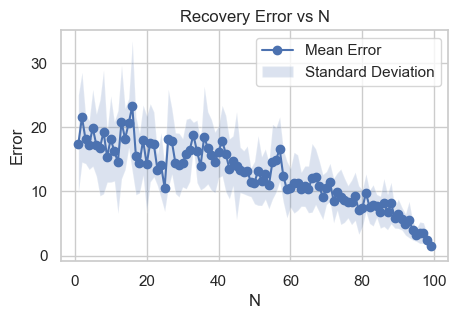

In [ ]:
# for each number of examples, compute the mean and standard deviation of the errors.
unique_n_examples = np.unique(n_examples)
mean_errors = []
std_errors = []
for n in unique_n_examples:
    mean_errors.append(np.mean([errors[i] for i in range(n_repeats) if n_examples[i] == n]))
    std_errors.append(np.std([errors[i] for i in range(n_repeats) if n_examples[i] == n]))

# let's plot it as a curve with error bars (or shades)
# make sure the plot is visually pleasing.
sns.set(style="whitegrid")
plt.figure(figsize=(5, 3))
plt.plot(unique_n_examples, mean_errors, marker='o', label='Mean Error')
plt.fill_between(unique_n_examples, 
                 np.array(mean_errors) - np.array(std_errors), 
                 np.array(mean_errors) + np.array(std_errors), 
                 alpha=0.2, label='Standard Deviation')
plt.xlabel('N')
plt.ylabel('Error')
plt.title('Recovery Error vs N')
plt.legend()
plt.grid(True)
plt.show()